In [1]:
!pip install osmnx matplotlib geopandas

  Using cached osmnx-1.9.3-py3-none-any.whl.metadata (4.8 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
Using cached osmnx-1.9.3-py3-none-any.whl (107 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)


In [3]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Function to fetch OSM data for Tirana
def fetch_osm_data():
    # Define the location
    place_name = "Tirana, Albania"
    
    # Fetch data
    # Graph data (streets and intersections)
    G = ox.graph_from_place(place_name, network_type='drive')
    # Convert graph to geodataframes
    nodes, edges = ox.graph_to_gdfs(G)
    
    return nodes, edges

# Analyze missing data
def analyze_missing_data(df):
    # Check for missing values in each column
    missing_data = df.isna().sum()
    return missing_data


# Visualization of the data
def visualize_data(nodes):
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    nodes.plot(ax=ax, color='blue', markersize=10)
    plt.title("Map of Nodes in Tirana")
    plt.show()

In [15]:
nodes, edges = fetch_osm_data()
print(edges)

                                osmid  oneway lanes                 name  \
u           v          key                                                 
15459891    15494062   0    458883732    True     2     Rruga Vaso Pasha   
            1840198326 0    674633067    True     1   Rruga Nikolla Tupe   
15460178    1843574977 0    255038660    True     1  Rruga Mustafa Qosja   
            4652332070 0    471055213    True   NaN  Rruga Mustafa Qosja   
15460384    15460178   0    255038660    True     1  Rruga Mustafa Qosja   
...                               ...     ...   ...                  ...   
11965353557 579803708  0     45498891   False   NaN                  NaN   
11965377529 2379517074 0    229339580   False     1   Rruga Hamid Dalipi   
            1843553061 0    727584078   False     2    Rruga e Elbasanit   
            1843553300 0    727584078   False     2    Rruga e Elbasanit   
11967924177 2379529655 0    229340601   False     1                  NaN   

           

In [7]:
print("Missing Data Analysis:")
print(analyze_missing_data(edges))

Missing Data Analysis:
osmid           0
oneway          0
lanes        5414
name         3319
highway         0
maxspeed     9706
reversed        0
length          0
geometry        0
ref         12146
bridge      12348
junction    12287
access      12362
width       12208
tunnel      12324
dtype: int64


In [11]:
import matplotlib.pyplot as plt

# Function to count and visualize the frequency of each value per tag in the dataset
def count_and_visualize_tags(edges):
    tags_analysis = {}
    
    # Iterate over each column to perform analysis
    for column in edges.columns:
        # Count frequency of each value in the column
        value_counts = edges[column].fillna('Missing').value_counts()  # Fill NaN with 'Missing'
        tags_analysis[column] = value_counts
        
        # Plotting the data
        fig, ax = plt.subplots()
        value_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
        ax.set_ylabel('')  # Remove the y-label since it's not necessary
        ax.set_title(f'Value distribution for {column}')
        plt.show()
    
    return tags_analysis

# You can call this function in the main execution flow after fetching the data



Most Used Tags:


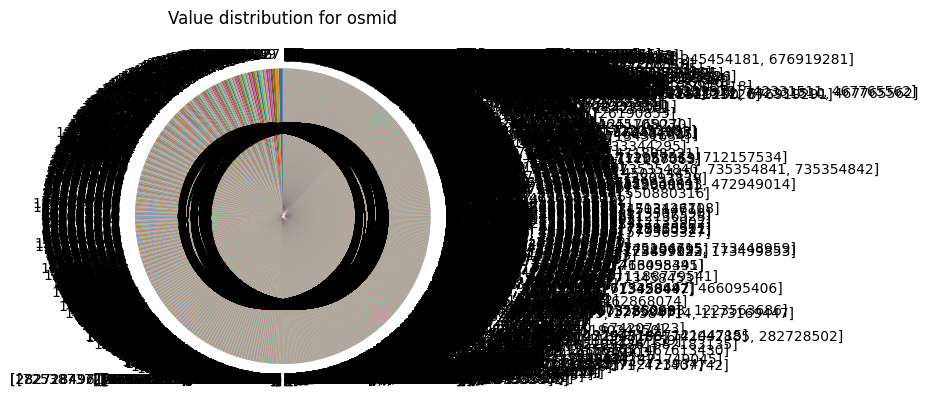

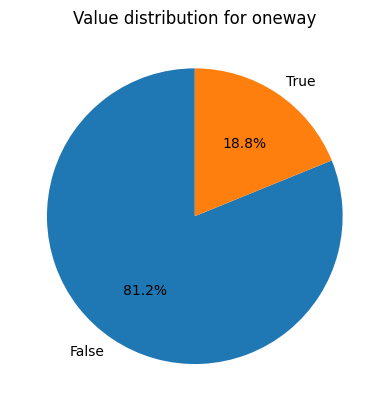

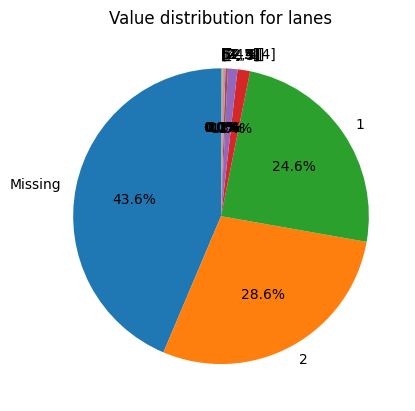

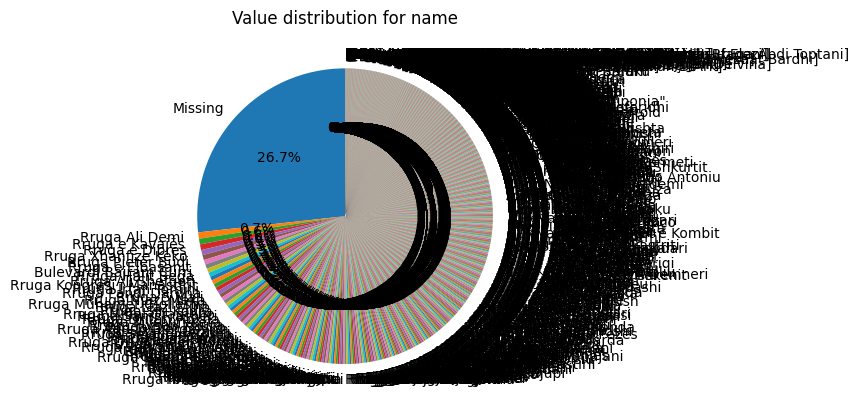

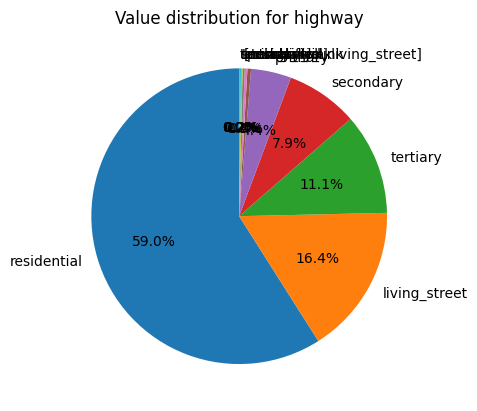

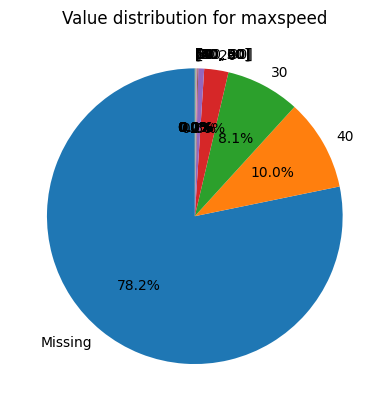

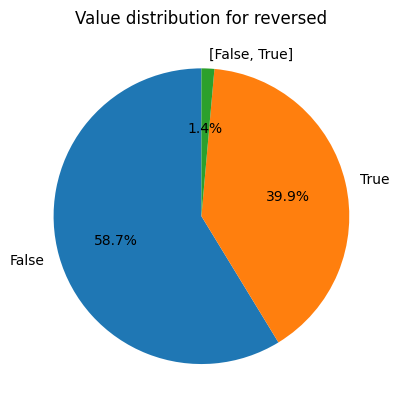

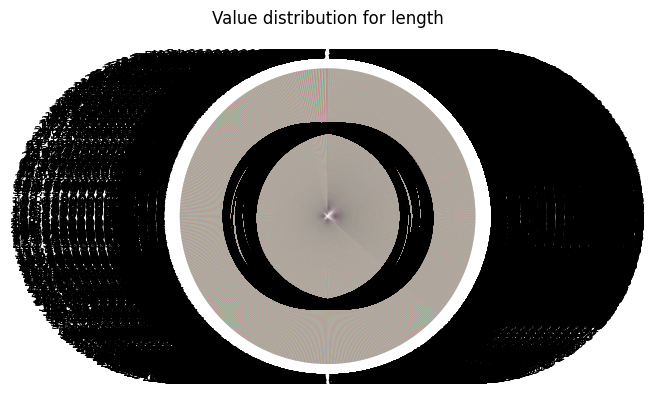

KeyboardInterrupt: 

In [12]:
print("\nMost Used Tags:")
print(count_and_visualize_tags(edges))

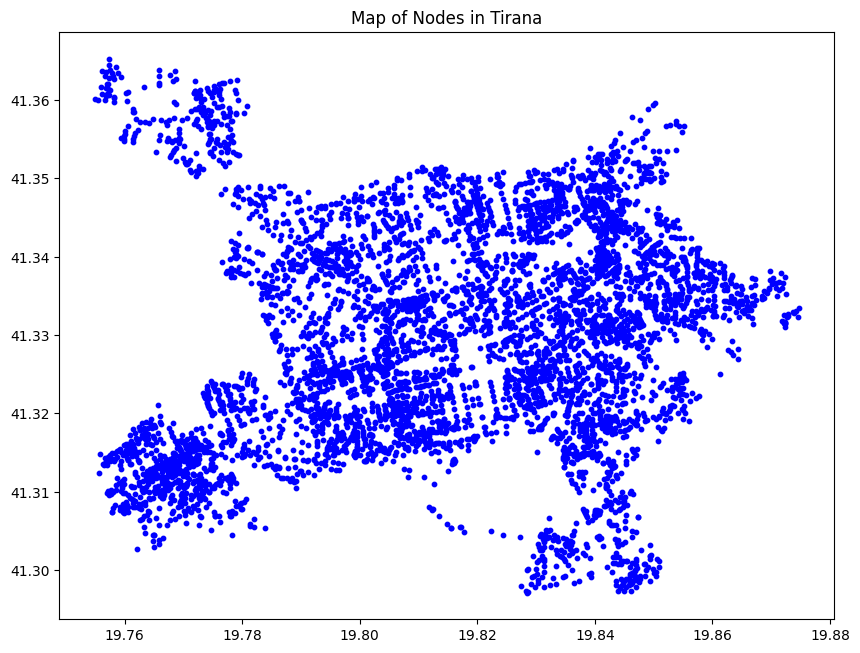

In [5]:
visualize_data(nodes)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_colored_table(edges):
    # Copy the dataframe to avoid modifying the original data
    data = edges.copy()

    # Fill missing values with a placeholder for visualization
    data.fillna('Missing', inplace=True)

    # Determine the most common value in each column
    most_common_values = data.mode().iloc[0]

    # Create a color map for the dataframe where:
    # - Grey: missing values
    # - Green: most frequent values
    # - Yellow: other values
    color_map = data.applymap(lambda x: 'grey' if x == 'Missing' else 'green' if x == most_common_values[data.columns[data.columns.get_loc(x.name)]] else 'yellow')

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size appropriately

    # Hide actual grid lines
    ax.grid(False)

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Hide the axes
    ax.axis('off')

    # Table creation
    table = ax.table(
        cellText=data.values,
        colLabels=data.columns,
        cellColours=color_map.values,
        cellLoc='center',
        loc='center',
        colWidths=[0.03]*len(data.columns)  # Adjust column widths as needed
    )

    # Automatically resize columns to fit content
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust fontsize to fit your needs
    table.scale(1.2, 1.2)  # Scale table size to fit your screen or figure

    plt.title('Data Tag Value Visualization')
    plt.show()


In [14]:

# Assume 'edges' is your DataFrame loaded with the OpenStreetMap data
create_colored_table(edges)  # Uncomment and run this in your local environment where 'edges' is defined


/home/pomodoren/Desktop/SUTi/ResMI/resmi/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1834: UserWarning: Unable to sort modes: '<' not supported between instances of 'LineString' and 'LineString'
  result = super().apply(
/tmp/ipykernel_631726/876893129.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  color_map = data.applymap(lambda x: 'grey' if x == 'Missing' else 'green' if x == most_common_values[data.columns[data.columns.get_loc(x.name)]] else 'yellow')


AttributeError: 'int' object has no attribute 'name'